In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

### Load the experiment and corresponding libraries

In [2]:
project_path = os.path.join(Path.home(), "projects")
sys.path.append(project_path)  # enable import of "bias_transfer_recipes"
os.chdir(os.path.join(project_path,"bias_transfer_recipes/work/"))

In [3]:
from bias_transfer_recipes.bias_transfer_recipes.main import load_experiment
experiment = load_experiment(recipe="_2020_09_10_benchmark", 
                             experiment="bias_transfer_benchmark", 
                             schema="",  # schema name will automatically be generated from recipe and experiment names 
                             base_dir=os.path.join(project_path,"bias_transfer_recipes/bias_transfer_recipes/"),
                             import_prefix="bias_transfer_recipes.bias_transfer_recipes.", 
                             dev_mode=True  
                            )

Connecting anix@datajoint-db.mlcloud.uni-tuebingen.de:3306


In [4]:
from bias_transfer.tables.transfer import *
from bias_transfer.tables.nnfabrik import *
schema

Connecting anix@datajoint-db.mlcloud.uni-tuebingen.de:3306


Schema `bias_transfer__2020_09_10_benchmark`

In [5]:
schema.jobs

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__transferred_trained_model,088769dcfe9cab43de6d32e5c734996f,reserved,=BLOB=,,=BLOB=,anix@134.2.168.25,slurm-bm-35.novalocal,263051,1802277,2020-11-24 13:51:16
__transferred_trained_model,25540ce4d6b7916fe6c36da12c09e387,reserved,=BLOB=,,=BLOB=,anix@134.2.168.25,slurm-bm-35.novalocal,247121,1791683,2020-11-24 10:21:23
__transferred_trained_model,3e0c0c4efc8abd72c6da4593a45dfb57,reserved,=BLOB=,,=BLOB=,anix@134.2.168.25,slurm-bm-35.novalocal,251343,1794953,2020-11-24 11:27:46
__transferred_trained_model,3fb2cb8c7b0080bf7d0257a58eef7e72,reserved,=BLOB=,,=BLOB=,anix@134.2.168.25,slurm-bm-35.novalocal,247726,1791944,2020-11-24 10:25:46
__transferred_trained_model,5a94ea2b3e07f928c2d5ced5aa42dc98,reserved,=BLOB=,,=BLOB=,anix@134.2.168.25,slurm-bm-35.novalocal,263116,1802281,2020-11-24 13:52:13
__transferred_trained_model,fe372a18efac154a2a23d25a51528771,error,=BLOB=,ModuleNotFoundError: No module named 'mlutils',=BLOB=,anix@134.2.168.25,slurm-bm-35.novalocal,291996,1830848,2020-11-24 23:10:49


### Analyse the results

In [13]:
from bias_transfer.analysis.results.analyzer_tracker import Analyzer
import seaborn as sns
import pandas as pd

In [18]:
analysis = Analyzer()

In [19]:
analysis.load_data(experiment.transfer_experiments, transfer_levels=(1,2,3))

In [20]:
analysis.generate_normalized_table()

,translation->clean,translation->clean normalized,translation,translation normalized
name,,,,
Direct Training A,33.533353,100.000000,NaN,NaN
Direct Training B,NaN,NaN,82.718272,100.000000
Transfer (Finetune),88.998900,265.404116,51.835184,62.664732
Transfer (KnowledgeDistillation),75.157516,224.127647,15.821582,19.127070
Transfer (RDL),88.678868,264.449746,22.742274,27.493653


No handles with labels found to put in legend.


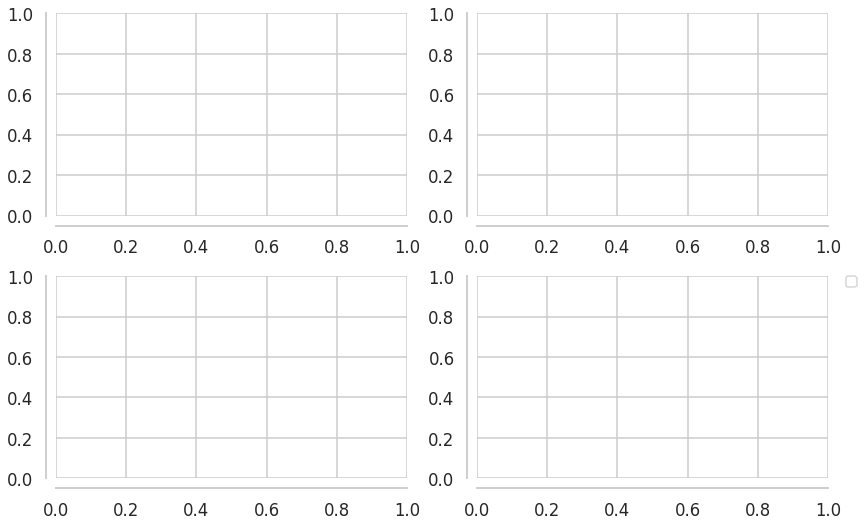

In [21]:
analysis.plot_frontier()

L 1
L 2
L 2
L 1
L 1


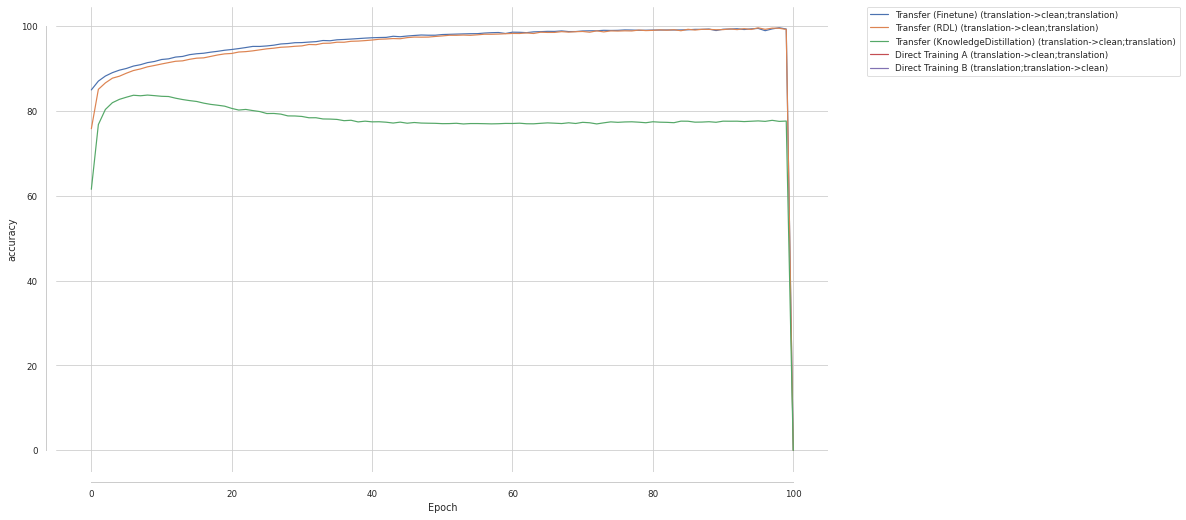

In [40]:
analysis.plot(
    to_plot=("Training","img_classification","accuracy"), 
        save="",
        style="lightpaper",
    plot_method="line",
    level=0
#     legend_outside=False
       )

In [28]:
%debug

> /home/anix/projects/ml-utils/mlutils/tracking.py(199)_get_objective()
    197     def _get_objective(self, log, keys):
    198         if len(keys) > 1:
--> 199             return self._get_objective(log[keys[0]], keys[1:])
    200         else:
    201             return log[keys[0]]



ipdb>  u


> /home/anix/projects/ml-utils/mlutils/tracking.py(204)get_objective()
    202 
    203     def get_objective(self, *keys):
--> 204         return self._get_objective(self._normalize_log(self.log), keys)
    205 
    206     def get_current_objective(self, *keys):



ipdb>  u


> /home/anix/projects/bias_transfer/bias_transfer/analysis/results/analyzer_tracker.py(308)plot()
    306             row_list = []
    307             for desc, tracker in self.data.items():
--> 308                 row = {"name": desc.name, to_plot[-1]: tracker[level].get_objective(*to_plot)}
    309                 row_list.append(row)
    310             df = pd.DataFrame(row_list)



ipdb>  d


> /home/anix/projects/ml-utils/mlutils/tracking.py(204)get_objective()
    202 
    203     def get_objective(self, *keys):
--> 204         return self._get_objective(self._normalize_log(self.log), keys)
    205 
    206     def get_current_objective(self, *keys):



ipdb>  self.log


{'LR': [0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0], 'Training': {'img_classification': {'loss': [31312.63894510269, 20828.344340324402, 18067.55685687065, 16585.969840049744, 15425.78596496582, 14630.419429779053, 13819.452621459961, 13212.

ipdb>  q
